In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the stock symbols
clean_energy_stocks = ['VWS.CO', 'BEP', 'EDPR.LS', 'RUN', 'MEL.NZ', 'VER.VI', 'FSLR', '9502.T', '009830.KS', 'ORA', 'ENPH', 'BE', 'SHLS', 'NEOEN.PA', 'BLX.TO', 'CWEN', 'ENLT.TA', 'ARRY', 'NXT', 'SEDG', 'ECV.DE', 'PLUG', 'ERG.MI', 'ANE.MC', 'GPRE', 'NDX1.DE', 'CSIQ', '0588.HK', 'INE.TO', 'NEL.OL']
oil_stocks = ['SU', 'PBR', 'COP', 'BP', 'EC', 'EOG', 'XOM', 'MPC', 'CVX', 'HES', 'PSX', 'MRO', 'EQNR', '0857.HK', 'OXY', 'SHEL', 'VLO', 'TTE']

# Function to get stock data
def get_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Calculate portfolio performance
def portfolio_annual_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# Minimize the negative Sharpe Ratio
def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# Constraints and bounds
def optimize_portfolio(tickers, start_date, end_date, risk_free_rate=0.02):
    data = get_stock_data(tickers, start_date, end_date)
    mean_returns = data.pct_change().mean()
    cov_matrix = data.pct_change().cov()

    num_assets = len(tickers)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = minimize(negative_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

# Optimize for both portfolios
start_date = '2019-01-01'
end_date = '2024-01-01'
clean_energy_portfolio = optimize_portfolio(clean_energy_stocks, start_date, end_date)
oil_portfolio = optimize_portfolio(oil_stocks, start_date, end_date)

# Print optimized weights for each portfolio
print("Optimized Portfolio Weights for Clean Energy Stocks:")
print(clean_energy_portfolio['x'])
print("\nOptimized Portfolio Weights for Oil Stocks:")
print(oil_portfolio['x'])

# Additional code may be needed for visualization and further analysis.


[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  18 of 18 completed

Optimized Portfolio Weights for Clean Energy Stocks:
[7.58945937e-02 7.19554489e-17 9.92050616e-02 0.00000000e+00
 4.38354797e-15 1.20330856e-15 0.00000000e+00 0.00000000e+00
 9.94974427e-16 0.00000000e+00 7.72611758e-02 0.00000000e+00
 1.82766244e-01 1.53350927e-01 0.00000000e+00 1.46694951e-16
 0.00000000e+00 5.27255473e-17 1.39144655e-01 8.03054997e-17
 0.00000000e+00 0.00000000e+00 2.26658824e-01 3.09658305e-17
 6.94094372e-16 1.06439515e-15 1.19053869e-15 4.30592079e-15
 4.57185186e-02 0.00000000e+00]

Optimized Portfolio Weights for Oil Stocks:
[2.56224805e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.28549818e-16 0.00000000e+00 2.70725282e-16 3.51173976e-01
 1.96167153e-01 0.00000000e+00 3.64725611e-16 1.96434065e-01
 0.00000000e+00 0.00000000e+00 1.25225351e-16 0.00000000e+00
 5.30716963e-16 0.00000000e+00]


In [6]:
# Function to get the 3-month Treasury rate
def get_risk_free_rate():
    treasury_df = yf.download("^IRX", start=start_date, end=end_date)['Adj Close']
    latest_rate = treasury_df.iloc[-1] / 100 # Converting from percentage
    return latest_rate / 252 # Daily rate

# Updated risk-free rate
risk_free_rate = get_risk_free_rate()

# Update the optimize_portfolio function to use the updated risk-free rate
def optimize_portfolio(tickers, start_date, end_date, risk_free_rate):
    data = get_stock_data(tickers, start_date, end_date)
    mean_returns = data.pct_change().mean()
    cov_matrix = data.pct_change().cov()

    num_assets = len(tickers)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = minimize(negative_sharpe, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result

# Re-optimize portfolios with updated risk-free rate
clean_energy_portfolio = optimize_portfolio(clean_energy_stocks, start_date, end_date, risk_free_rate)
oil_portfolio = optimize_portfolio(oil_stocks, start_date, end_date, risk_free_rate)

# Print optimized weights for each portfolio
print("Optimized Portfolio Weights for Clean Energy Stocks with Updated Risk-Free Rate:")
print(clean_energy_portfolio['x'])
print("\nOptimized Portfolio Weights for Oil Stocks with Updated Risk-Free Rate:")
print(oil_portfolio['x'])

# Visualization and further analysis code as needed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  18 of 18 completed

Optimized Portfolio Weights for Clean Energy Stocks with Updated Risk-Free Rate:
[7.21128034e-02 2.28212444e-16 1.45904544e-01 2.14094093e-16
 1.55828778e-16 3.58422809e-16 6.26691927e-17 6.18028749e-16
 4.85192433e-16 2.27339416e-16 7.05955718e-02 2.96092857e-16
 1.68641282e-01 1.29530648e-01 2.09972871e-02 3.71416661e-16
 5.97290020e-16 1.33872674e-16 1.44551507e-01 6.14509613e-17
 1.87161176e-16 2.18557389e-16 2.01232139e-01 3.98748414e-16
 2.53783043e-16 6.83808529e-16 9.60997211e-16 4.89194017e-16
 4.64342177e-02 2.60628247e-16]

Optimized Portfolio Weights for Oil Stocks with Updated Risk-Free Rate:
[2.98565596e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.92192485e-16 1.49511480e-16 2.20201461e-16 3.23679805e-01
 1.92087876e-01 1.32381085e-16 2.90891443e-16 1.85666723e-01
 2.62376926e-17 0.00000000e+00 1.12540186e-16 2.06432094e-16
 2.50450702e-16 8.48930301e-17]


[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  18 of 18 completed
[*********************100%%**********************]  18 of 18 completed


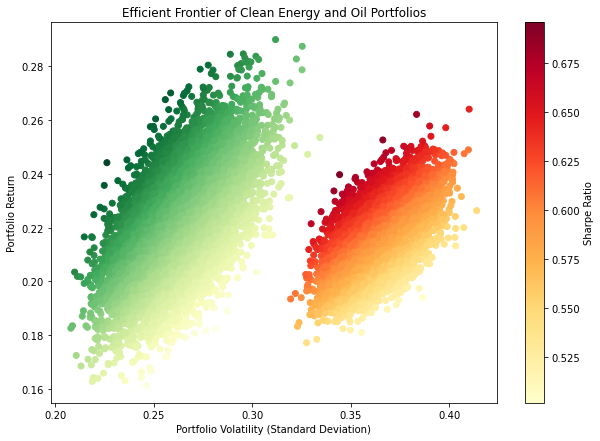

In [7]:
# Function to generate random portfolios
def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_std_dev, portfolio_return = portfolio_annual_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results

# Generate random portfolios
num_portfolios = 10000
clean_energy_mean_returns = get_stock_data(clean_energy_stocks, start_date, end_date).pct_change().mean()
clean_energy_cov_matrix = get_stock_data(clean_energy_stocks, start_date, end_date).pct_change().cov()
clean_energy_portfolios = generate_random_portfolios(num_portfolios, clean_energy_mean_returns, clean_energy_cov_matrix, risk_free_rate)

oil_mean_returns = get_stock_data(oil_stocks, start_date, end_date).pct_change().mean()
oil_cov_matrix = get_stock_data(oil_stocks, start_date, end_date).pct_change().cov()
oil_portfolios = generate_random_portfolios(num_portfolios, oil_mean_returns, oil_cov_matrix, risk_free_rate)

# Plotting the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(clean_energy_portfolios[0,:], clean_energy_portfolios[1,:], c=clean_energy_portfolios[2,:], cmap='YlGn', marker='o')
plt.scatter(oil_portfolios[0,:], oil_portfolios[1,:], c=oil_portfolios[2,:], cmap='YlOrRd', marker='o')
plt.title('Efficient Frontier of Clean Energy and Oil Portfolios')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  18 of 18 completed


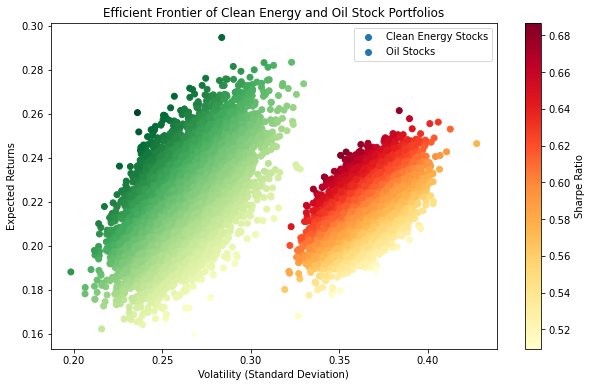

In [8]:
def efficient_frontier(mean_returns, cov_matrix, risk_free_rate, num_portfolios=10000):
    results = np.zeros((3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)

        portfolio_stddev, portfolio_return = portfolio_annual_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_stddev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_stddev  # Sharpe Ratio

    return results

# Get data and calculate mean returns and covariance matrices for both portfolios
clean_energy_data = get_stock_data(clean_energy_stocks, start_date, end_date)
clean_energy_mean_returns = clean_energy_data.pct_change().mean()
clean_energy_cov_matrix = clean_energy_data.pct_change().cov()

oil_data = get_stock_data(oil_stocks, start_date, end_date)
oil_mean_returns = oil_data.pct_change().mean()
oil_cov_matrix = oil_data.pct_change().cov()

# Generate efficient frontiers for both sets
clean_energy_frontier = efficient_frontier(clean_energy_mean_returns, clean_energy_cov_matrix, risk_free_rate)
oil_frontier = efficient_frontier(oil_mean_returns, oil_cov_matrix, risk_free_rate)

# Plotting the efficient frontiers
plt.figure(figsize=(10, 6))
plt.scatter(clean_energy_frontier[0,:], clean_energy_frontier[1,:], c=clean_energy_frontier[2,:], cmap='YlGn', label='Clean Energy Stocks')
plt.scatter(oil_frontier[0,:], oil_frontier[1,:], c=oil_frontier[2,:], cmap='YlOrRd', label='Oil Stocks')
plt.title('Efficient Frontier of Clean Energy and Oil Stock Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.show()

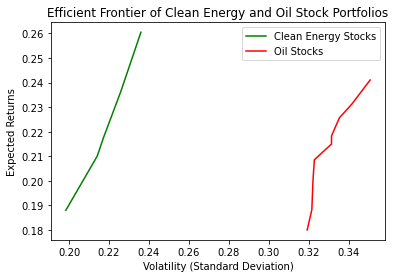

In [14]:
def plot_efficient_frontier(results, label, color):
    # Convert results to a numpy array if it's not already
    results = np.array(results)

    # Check if the results array is empty or does not have the expected structure
    if results.size == 0 or results.shape[0] != 3:
        print("No data in results array or unexpected structure for", label)
        return

    # Create an empty list to hold the efficient portfolios
    efficient_portfolios = []

    # Sort the portfolios by increasing standard deviation (risk)
    sorted_portfolios = results[:, results[0].argsort()]

    # Iterate through the sorted portfolios
    max_sharpe = 0
    for portfolio in sorted_portfolios.T:
        if portfolio[2] >= max_sharpe:  # Check if Sharpe ratio is greater than or equal to max_sharpe
            efficient_portfolios.append(portfolio)
            max_sharpe = portfolio[2]

    # Convert the list of efficient portfolios to a numpy array
    efficient_portfolios = np.array(efficient_portfolios).T

    # Plot the efficient frontier line
    plt.plot(efficient_portfolios[0], efficient_portfolios[1], color=color, label=label)

# Rest of your existing code ...

# Plot Efficient Frontier Line for Clean Energy Stocks
plot_efficient_frontier(clean_energy_frontier, 'Clean Energy Stocks', 'green')

# Plot Efficient Frontier Line for Oil Stocks
plot_efficient_frontier(oil_frontier, 'Oil Stocks', 'red')

plt.title('Efficient Frontier of Clean Energy and Oil Stock Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()


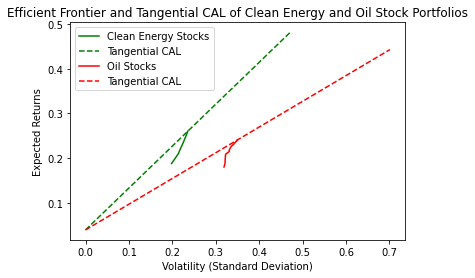

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have already defined functions like get_stock_data, portfolio_annual_performance, and optimize_portfolio

# Function to plot the efficient frontier
def plot_efficient_frontier(results, label, color):
    # Convert results to a numpy array if it's not already
    results = np.array(results)

    # Check if the results array is empty or does not have the expected structure
    if results.size == 0 or results.shape[0] != 3:
        print("No data in results array or unexpected structure for", label)
        return

    # Create an empty list to hold the efficient portfolios
    efficient_portfolios = []

    # Sort the portfolios by increasing standard deviation (risk)
    sorted_portfolios = results[:, results[0].argsort()]

    # Iterate through the sorted portfolios
    max_sharpe = 0
    for portfolio in sorted_portfolios.T:
        if portfolio[2] >= max_sharpe:  # Check if Sharpe ratio is greater than or equal to max_sharpe
            efficient_portfolios.append(portfolio)
            max_sharpe = portfolio[2]

    # Convert the list of efficient portfolios to a numpy array
    efficient_portfolios = np.array(efficient_portfolios).T

    # Plot the efficient frontier line
    plt.plot(efficient_portfolios[0], efficient_portfolios[1], color=color, label=label)

    # Plot the tangential Capital Allocation Line (CAL)
    add_cal_to_plot(efficient_portfolios, color)

# Function to plot the tangential Capital Allocation Line (CAL)
def add_cal_to_plot(efficient_portfolios, color):
    # Get the portfolio with the maximum Sharpe ratio
    max_sharpe_portfolio = efficient_portfolios[:, efficient_portfolios[2].argmax()]

    # Calculate the CAL slope
    cal_slope = (max_sharpe_portfolio[1] - risk_free_rate) / max_sharpe_portfolio[0]

    # Define points for the CAL line
    cal_x = np.linspace(0, max_sharpe_portfolio[0] * 2, 100)
    cal_y = risk_free_rate + cal_slope * cal_x

    # Plot the CAL
    plt.plot(cal_x, cal_y, linestyle='--', color=color, label='Tangential CAL')

# Rest of your existing code ...

# Plot Efficient Frontier Line for Clean Energy Stocks
plot_efficient_frontier(clean_energy_frontier, 'Clean Energy Stocks', 'green')

# Plot Efficient Frontier Line for Oil Stocks
plot_efficient_frontier(oil_frontier, 'Oil Stocks', 'red')

plt.title('Efficient Frontier and Tangential CAL of Clean Energy and Oil Stock Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_efficient_frontier(results, label, color):
    results = np.array(results)
    if results.size == 0 or results.shape[0] != 3:
        print("No data in results array or unexpected structure for", label)
        return

    efficient_portfolios = []
    sorted_portfolios = results[:, results[0].argsort()]
    max_sharpe = 0
    for portfolio in sorted_portfolios.T:
        if portfolio[2] >= max_sharpe:
            efficient_portfolios.append(portfolio)
            max_sharpe = portfolio[2]

    efficient_portfolios = np.array(efficient_portfolios).T

def quadratic_curve(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic curve to the efficient frontier data points
params, _ = curve_fit(quadratic_curve, efficient_portfolios[0], efficient_portfolios[1])

# Define a wider range of standard deviations (volatility)
extended_std_dev = np.linspace(efficient_portfolios[0].min() * 0.8, efficient_portfolios[0].max() * 1.5, 500)

# Calculate the extended efficient frontier using the fitted curve
extended_efficient_frontier = quadratic_curve(extended_std_dev, *params)

# Plot the extended efficient frontier line
plt.plot(extended_std_dev, extended_efficient_frontier, color=color, label=label)

plot_efficient_frontier(clean_energy_frontier, 'Clean Energy Stocks', 'green')

plot_efficient_frontier(oil_frontier, 'Oil Stocks', 'red')

plt.title('Extended Efficient Frontier of Clean Energy and Oil Stock Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()



NameError: name 'efficient_portfolios' is not defined

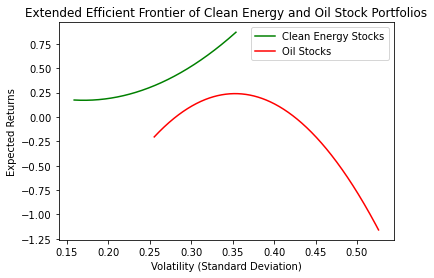

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def quadratic_curve(x, a, b, c):
    return a * x**2 + b * x + c

def plot_efficient_frontier(results, label, color):
    # Convert results to a numpy array if it's not already
    results = np.array(results)

    # Check if the results array is empty or does not have the expected structure
    if results.size == 0 or results.shape[0] != 3:
        print("No data in results array or unexpected structure for", label)
        return

    # Create an empty list to hold the efficient portfolios
    efficient_portfolios = []

    # Sort the portfolios by increasing standard deviation (risk)
    sorted_portfolios = results[:, results[0].argsort()]

    # Iterate through the sorted portfolios
    max_sharpe = 0
    for portfolio in sorted_portfolios.T:
        if portfolio[2] >= max_sharpe:  # Check if Sharpe ratio is greater than or equal to max_sharpe
            efficient_portfolios.append(portfolio)
            max_sharpe = portfolio[2]

    # Convert the list of efficient portfolios to a numpy array
    efficient_portfolios = np.array(efficient_portfolios).T

    # Fit the quadratic curve to the efficient frontier data points
    params, _ = curve_fit(quadratic_curve, efficient_portfolios[0], efficient_portfolios[1])

    # Define a wider range of standard deviations (volatility)
    extended_std_dev = np.linspace(efficient_portfolios[0].min() * 0.8, efficient_portfolios[0].max() * 1.5, 500)

    # Calculate the extended efficient frontier using the fitted curve
    extended_efficient_frontier = quadratic_curve(extended_std_dev, *params)

    # Plot the extended efficient frontier line
    plt.plot(extended_std_dev, extended_efficient_frontier, color=color, label=label)

# Rest of your existing code ...

# Plot Efficient Frontier Line for Clean Energy Stocks
plot_efficient_frontier(clean_energy_frontier, 'Clean Energy Stocks', 'green')

# Plot Efficient Frontier Line for Oil Stocks
plot_efficient_frontier(oil_frontier, 'Oil Stocks', 'red')

plt.title('Extended Efficient Frontier of Clean Energy and Oil Stock Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()


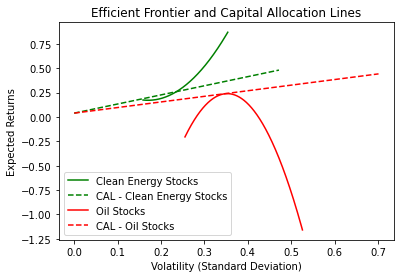

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def quadratic_curve(x, a, b, c):
    return a * x**2 + b * x + c

def plot_efficient_frontier(results, label, color, risk_free_rate):
    # Convert results to a numpy array if it's not already
    results = np.array(results)

    # Check if the results array is empty or does not have the expected structure
    if results.size == 0 or results.shape[0] != 3:
        print("No data in results array or unexpected structure for", label)
        return

    # Create an empty list to hold the efficient portfolios
    efficient_portfolios = []

    # Sort the portfolios by increasing standard deviation (risk)
    sorted_portfolios = results[:, results[0].argsort()]

    # Iterate through the sorted portfolios
    max_sharpe = 0
    for portfolio in sorted_portfolios.T:
        if portfolio[2] >= max_sharpe:  # Check if Sharpe ratio is greater than or equal to max_sharpe
            efficient_portfolios.append(portfolio)
            max_sharpe = portfolio[2]

    # Convert the list of efficient portfolios to a numpy array
    efficient_portfolios = np.array(efficient_portfolios).T

    # Fit the quadratic curve to the efficient frontier data points
    params, _ = curve_fit(quadratic_curve, efficient_portfolios[0], efficient_portfolios[1])

    # Define a wider range of standard deviations (volatility)
    extended_std_dev = np.linspace(efficient_portfolios[0].min() * 0.8, efficient_portfolios[0].max() * 1.5, 500)

    # Calculate the extended efficient frontier using the fitted curve
    extended_efficient_frontier = quadratic_curve(extended_std_dev, *params)

    # Plot the extended efficient frontier line
    plt.plot(extended_std_dev, extended_efficient_frontier, color=color, label=label)
    

    # Find the portfolio with the highest Sharpe ratio
    max_sharpe_portfolio = results[:, results[2].argmax()]

    # Plot the Capital Allocation Line
    slope = (max_sharpe_portfolio[1] - risk_free_rate) / max_sharpe_portfolio[0]
    cal_x = np.linspace(0, max_sharpe_portfolio[0] * 2, 100)
    cal_y = risk_free_rate + slope * (cal_x - 0)
    plt.plot(cal_x, cal_y, color=color, linestyle='--', label=f'CAL - {label}')

# Define risk-free rate
risk_free_rate = 0.0395  # 3.95%

# Plot Efficient Frontier Line for Clean Energy Stocks
plot_efficient_frontier(clean_energy_frontier, 'Clean Energy Stocks', 'green', risk_free_rate)

# Plot Efficient Frontier Line for Oil Stocks
plot_efficient_frontier(oil_frontier, 'Oil Stocks', 'red', risk_free_rate)

plt.title('Efficient Frontier and Capital Allocation Lines')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()


[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  18 of 18 completed


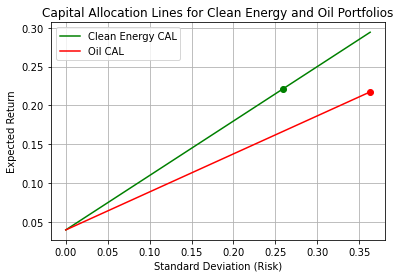

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already defined functions like get_stock_data, portfolio_annual_performance

risk_free_rate = 3.95 / 100  # Converting percentage to a decimal

def capital_allocation_line(mean_return, std_dev, risk_free_rate):
    # Calculate the slope (Sharpe ratio) of the CAL
    slope = (mean_return - risk_free_rate) / std_dev
    return lambda x: risk_free_rate + slope * x

# Get the portfolio performance metrics
def get_portfolio_metrics(portfolio_data):
    mean_returns = portfolio_data.pct_change().mean()
    cov_matrix = portfolio_data.pct_change().cov()
    weights = np.full((len(mean_returns), ), 1.0 / len(mean_returns))
    std_dev, mean_return = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    return std_dev, mean_return

# Get data for both portfolios
clean_energy_data = get_stock_data(clean_energy_stocks, start_date, end_date)
oil_data = get_stock_data(oil_stocks, start_date, end_date)

# Calculate the metrics
clean_energy_std, clean_energy_return = get_portfolio_metrics(clean_energy_data)
oil_std, oil_return = get_portfolio_metrics(oil_data)

# Create CAL functions
cal_clean_energy = capital_allocation_line(clean_energy_return, clean_energy_std, risk_free_rate)
cal_oil = capital_allocation_line(oil_return, oil_std, risk_free_rate)

# Plotting
x = np.linspace(0, max(clean_energy_std, oil_std), 100)
plt.plot(x, cal_clean_energy(x), label="Clean Energy CAL", color='green')
plt.plot(x, cal_oil(x), label="Oil CAL", color='red')

# Mark the portfolio points
plt.scatter(clean_energy_std, clean_energy_return, color='green')
plt.scatter(oil_std, oil_return, color='red')

plt.title("Capital Allocation Lines for Clean Energy and Oil Portfolios")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()


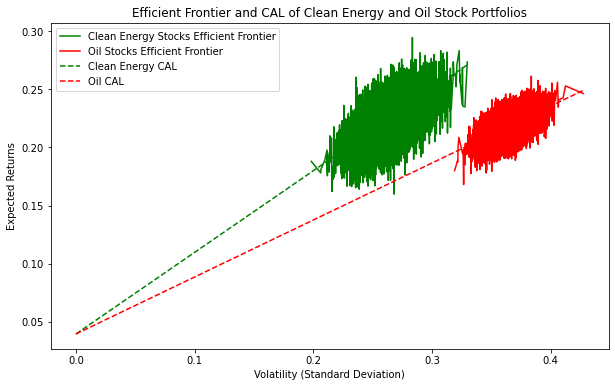

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the previous functions and data fetching are in place

risk_free_rate = 3.95 / 100  # 10-year Treasury rate

def capital_allocation_line(mean_return, std_dev, risk_free_rate):
    # Calculate the slope (Sharpe ratio) of the CAL
    slope = (mean_return - risk_free_rate) / std_dev
    return lambda x: risk_free_rate + slope * x

# Function to plot the efficient frontier
def plot_efficient_frontier(results, label, color):
    # Sort the portfolios by increasing standard deviation (risk)
    sorted_portfolios = results[:, results[0].argsort()]
    plt.plot(sorted_portfolios[0], sorted_portfolios[1], label=label + ' Efficient Frontier', color=color)

# Function to add CAL to the plot
def add_cal_to_plot(cal, max_std, label, color):
    x = np.linspace(0, max_std, 100)
    plt.plot(x, cal(x), linestyle='--', label=label + ' CAL', color=color)

# Get the portfolio performance metrics (mean return and std dev)
# Assuming you have a function or a way to calculate these for your portfolios
clean_energy_std, clean_energy_return = get_portfolio_metrics(clean_energy_data)
oil_std, oil_return = get_portfolio_metrics(oil_data)

# Create CAL functions
cal_clean_energy = capital_allocation_line(clean_energy_return, clean_energy_std, risk_free_rate)
cal_oil = capital_allocation_line(oil_return, oil_std, risk_free_rate)

# Plotting the efficient frontiers
plt.figure(figsize=(10, 6))

plot_efficient_frontier(clean_energy_frontier, 'Clean Energy Stocks', 'green')
plot_efficient_frontier(oil_frontier, 'Oil Stocks', 'red')

# Adding CALs to the plot
add_cal_to_plot(cal_clean_energy, max(clean_energy_frontier[0]), 'Clean Energy', 'green')
add_cal_to_plot(cal_oil, max(oil_frontier[0]), 'Oil', 'red')

plt.title('Efficient Frontier and CAL of Clean Energy and Oil Stock Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.legend()
plt.show()


In [20]:
!pip install openpyx1

ERROR: Could not find a version that satisfies the requirement openpyx1 (from versions: none)
ERROR: No matching distribution found for openpyx1


In [21]:
!pip install pandas openpyxl


In [24]:
import pandas as pd

# Assuming clean_energy_data and oil_data are your portfolio data in pandas DataFrame format
# Replace these with your actual DataFrame variables

# Export to Excel
with pd.ExcelWriter('portfolios.xlsx', engine='openpyxl') as writer:
    clean_energy_data.to_excel(writer, sheet_name='Clean Energy Stocks')
    oil_data.to_excel(writer, sheet_name='Oil Stocks')

print("Portfolios exported to 'portfolios.xlsx'")


Portfolios exported to 'portfolios.xlsx'


In [23]:
!pip install --upgrade openpyxl


  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.4
    Uninstalling openpyxl-3.0.4:
      Successfully uninstalled openpyxl-3.0.4


In [25]:
import pandas as pd

# Assuming your stock price data is in pandas DataFrames named clean_energy_data and oil_data
# Replace these with your actual DataFrame names if they're different

# Calculate daily returns for clean energy stocks
clean_energy_returns = clean_energy_data.pct_change().dropna()

# Calculate daily returns for oil stocks
oil_returns = oil_data.pct_change().dropna()

# Export to Excel
with pd.ExcelWriter('stock_returns.xlsx', engine='xlsxwriter') as writer:
    clean_energy_returns.to_excel(writer, sheet_name='Clean Energy Returns')
    oil_returns.to_excel(writer, sheet_name='Oil Returns')

print("Stock returns exported to 'stock_returns.xlsx'")


Stock returns exported to 'stock_returns.xlsx'


In [26]:
print("First date in Clean Energy Data:", clean_energy_data.index.min())
print("First date in Oil Data:", oil_data.index.min())

First date in Clean Energy Data: 2019-01-01 00:00:00
First date in Oil Data: 2019-01-02 00:00:00


In [27]:
clean_energy_returns = clean_energy_data.pct_change()
oil_returns = oil_data.pct_change()

In [28]:
clean_energy_returns = clean_energy_returns.dropna()
oil_returns = oil_returns.dropna()

In [29]:
with pd.ExcelWriter('stock_returns.xlsx', engine='xlsxwriter') as writer:
    clean_energy_returns.to_excel(writer, sheet_name='Clean Energy Returns')
    oil_returns.to_excel(writer, sheet_name='Oil Returns')

print("Stock returns exported to 'stock_returns.xlsx'")

Stock returns exported to 'stock_returns.xlsx'


In [30]:
print(clean_energy_returns)

            009830.KS   0588.HK    9502.T    ANE.MC      ARRY        BE  \
Date                                                                      
2023-02-10   0.000000  0.000000  0.006512  0.012931 -0.023564  0.017343   
2023-02-12   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-02-13  -0.037696 -0.010638 -0.004313  0.004787  0.062343 -0.031185   
2023-02-14  -0.007617  0.000000  0.006498 -0.013764 -0.015618 -0.003863   
2023-02-15  -0.019737 -0.010753 -0.001435  0.002684  0.068750  0.051702   
...               ...       ...       ...       ...       ...       ...   
2023-12-26  -0.002594  0.000000 -0.004769  0.000000  0.006957  0.014113   
2023-12-27   0.003901 -0.014084  0.020575  0.021629 -0.014393  0.010603   
2023-12-28   0.023316  0.042857 -0.006076 -0.003529 -0.001752 -0.001312   
2023-12-29   0.000000 -0.013699  0.012226 -0.005666 -0.016969 -0.028234   
2023-12-31   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                 BEP    

In [31]:
print(clean_energy_data)

               009830.KS   0588.HK       9502.T  ANE.MC       ARRY     BE  \
Date                                                                        
2019-01-01           NaN       NaN          NaN     NaN        NaN    NaN   
2019-01-02  21022.812500  1.776267          NaN     NaN        NaN  10.12   
2019-01-03  20173.406250  1.733975          NaN     NaN        NaN  10.47   
2019-01-04  20438.845703  1.750892  1362.786133     NaN        NaN  11.83   
2019-01-06           NaN       NaN          NaN     NaN        NaN    NaN   
...                  ...       ...          ...     ...        ...    ...   
2023-12-26  38450.000000       NaN  1774.000000     NaN  17.370001  15.09   
2023-12-27  38600.000000  0.700000  1810.500000   28.34  17.120001  15.25   
2023-12-28  39500.000000  0.730000  1799.500000   28.24  17.090000  15.23   
2023-12-29           NaN  0.720000  1821.500000   28.08  16.799999  14.80   
2023-12-31           NaN       NaN          NaN     NaN        NaN    NaN   

In [32]:
clean_energy_returns = clean_energy_data.pct_change()

In [33]:
print(clean_energy_returns)

            009830.KS   0588.HK    9502.T    ANE.MC      ARRY        BE  \
Date                                                                      
2019-01-01        NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-02        NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-03  -0.040404 -0.023809       NaN       NaN       NaN  0.034585   
2019-01-04   0.013158  0.009756       NaN       NaN       NaN  0.129895   
2019-01-06   0.000000  0.000000  0.000000       NaN       NaN  0.000000   
...               ...       ...       ...       ...       ...       ...   
2023-12-26  -0.002594  0.000000 -0.004769  0.000000  0.006957  0.014113   
2023-12-27   0.003901 -0.014084  0.020575  0.021629 -0.014393  0.010603   
2023-12-28   0.023316  0.042857 -0.006076 -0.003529 -0.001752 -0.001312   
2023-12-29   0.000000 -0.013699  0.012226 -0.005666 -0.016969 -0.028234   
2023-12-31   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                 BEP    

In [34]:
with pd.ExcelWriter('stock_returns.xlsx', engine='xlsxwriter') as writer:
    clean_energy_returns.to_excel(writer, sheet_name='Clean Energy Returns')
    oil_returns.to_excel(writer, sheet_name='Oil Returns')

print("Stock returns exported to 'stock_returns.xlsx'")

Stock returns exported to 'stock_returns.xlsx'
